In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import skimage.io
import os
from PIL import Image
from os import listdir
%matplotlib inline


C:\Users\arpit\AppData\Local\Temp\ipykernel_7856\1521909780.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from PIL import Image
import os

# Specify the path to your image folder
folder_path = 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images'


# List all files in the folder
file_list = os.listdir(folder_path)

# Load images into a list
images = []
for file in file_list:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Open the image and append it to the list
        img = Image.open(os.path.join(folder_path, file))
        images.append(img)

# Now 'images' contains all the images from the folder


In [3]:
base_dir_train= 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images'

In [4]:
images_train=os.listdir(base_dir_train)
type(images_train)
len(images_train)

3662

In [5]:
import os
# Get a list of all files in the directory
file_list = os.listdir(base_dir_train)

# Filter the list to include only image files (extensions: .png, .jpg, .jpeg, .gif, .bmp)
image_extensions = ['.png', '.jpg', '.jpeg', '.gif', '.bmp']
image_files_train = [os.path.join(base_dir_train, file_name) for file_name in file_list if any(file_name.lower().endswith(ext) for ext in image_extensions)]

# Now 'image_files' is a list containing the file paths of all image files in the directory
print(image_files_train)


['C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\000c1434d8d7.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\001639a390f0.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0024cdab0c1e.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\002c21358ce6.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\005b95c28852.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0083ee8054ee.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\0097f532ac9f.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00a8624548a9.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00b74780d31d.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cb6555d108.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00cc2b75cddd.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00e4ddff966a.png', 'C:/Users/arpit/Documents/mthd=-/Green_Channel_Images\\00f6c1be5a33.png', 'C:/Users/arpit/Documents/mthd=-/Gree

In [6]:
import cv2

'''def histogram_equalization(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    return equalized'''

def apply_clahe(image, clip_limit=2.0, grid_size=(8, 8)):
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:  # Check if the image is not grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    # Apply CLAHE
    clahe_output = clahe.apply(gray)
    return clahe_output

def apply_adaptive_median(image, kernel_size=3):
    # Apply Adaptive Median filter
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image
    
def equalize_images_with_adaptive_median(image_paths):
    equalized_images = []
    for path in image_paths:
        # Read the image
        image = cv2.imread(path)
        # Apply histogram equalization
        #equalized_image = histogram_equalization(image)
        # Apply CLAHE
        clahe_output = apply_clahe(image)
        # Apply Adaptive Median filter
        blurred_image = apply_adaptive_median(clahe_output)
        equalized_images.append(blurred_image)
    return equalized_images

# Example usage:
image_paths = image_files_train  # Assuming image_files_train contains the paths to your image files
equalized_images_with_adaptive_median = equalize_images_with_adaptive_median(image_paths)


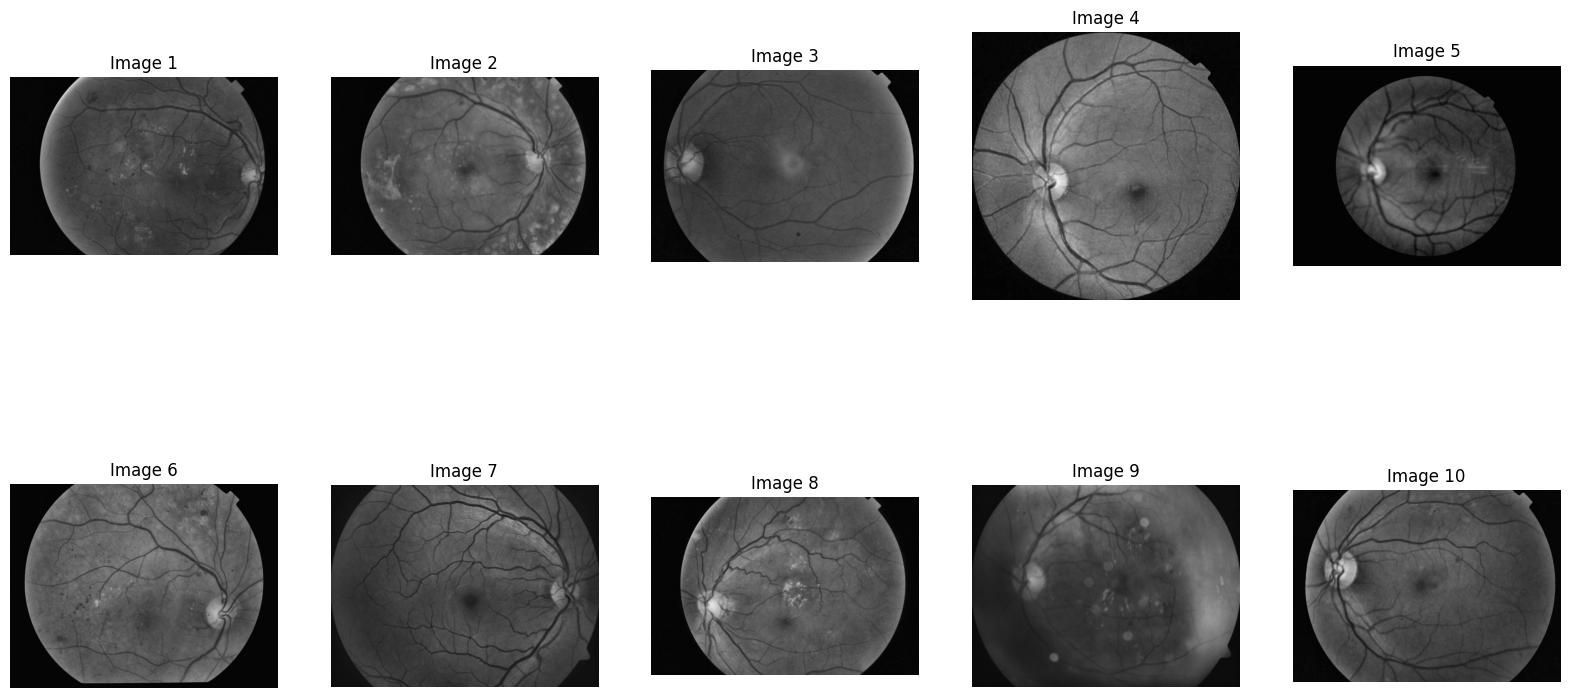

In [7]:
# Assuming equalized_images_with_gaussian contains the processed images
# Display the first 10 images
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(equalized_images_with_adaptive_median[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [16]:
import cv2
import numpy as np
import pandas as pd
import os
from skimage.feature.texture import graycomatrix, graycoprops

image_path = image_files_train

# Function to extract GLCM features from an image
def extract_glcm_features(image):
    if len(image.shape) > 2:  # Check if the image is not grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Define GLCM parameters
    distances = [1, 3, 5]  # distances for pixel pairs
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # angles for pixel pairs
    levels = 256  # number of gray levels
    symmetric = True
    normed = True

    # Compute GLCM
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)

    # Compute GLCM properties
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
    glcm_features = []
    for prop in properties:
        prop_values = graycoprops(glcm, prop)
        glcm_features.extend(prop_values.flatten())

    return glcm_features

# Initialize lists to store image names and features
image_names = []
glcm_features_list = []

# Extract GLCM features for each image in the list equalized_images_with_adaptive_median
for i, image in enumerate(equalized_images_with_adaptive_median):
    features = extract_glcm_features(image)
    glcm_features_list.append(features)

    # Store image names as 'Image_X' where X is the index of the image in the list
    image_name = os.path.splitext(os.path.basename(image_path[i]))[0]
    image_names.append(image_name)

# Convert the lists of names and features to a DataFrame
data = np.array(glcm_features_list)
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(data.shape[1])])
df.insert(0, 'Image_Name', image_names)

# Save the DataFrame to a CSV file
df.to_csv('glcm_features_with_names_equalized_images_clahe_adaptive_median.csv', index=False)


In [6]:
df=pd.read_csv('glcm_features_with_names_equalized_images_clahe_adaptive_median.csv')

In [7]:
df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_50,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59
0,000c1434d8d7,6.133980,9.640779,4.642814,8.237636,29.180737,25.523077,20.340645,21.076747,52.432988,...,0.997773,0.996048,0.985992,0.987747,0.990240,0.989881,0.974811,0.973228,0.983009,0.978591
1,001639a390f0,3.998955,5.721119,2.960177,5.647766,18.547278,14.857636,12.208485,14.588045,35.935475,...,0.999061,0.998207,0.994108,0.995281,0.996125,0.995366,0.988573,0.988823,0.992892,0.989030
2,0024cdab0c1e,8.648065,13.219109,6.280796,11.834252,39.274131,33.495096,26.080580,29.769498,65.848293,...,0.996403,0.993215,0.977443,0.980764,0.985048,0.982904,0.962096,0.962734,0.976622,0.966903
3,002c21358ce6,18.783445,30.982506,17.220478,31.799901,92.478499,83.649409,89.844560,85.814390,165.842627,...,0.995943,0.992494,0.978129,0.980182,0.978759,0.979669,0.960640,0.953953,0.959669,0.953239
4,005b95c28852,8.327156,14.281939,8.999572,13.858304,30.301972,30.176937,32.150416,28.970258,43.380735,...,0.996268,0.994253,0.987435,0.987490,0.986671,0.987990,0.982017,0.979240,0.981232,0.980231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,5.918741,9.552944,5.368019,9.294108,27.595694,25.031364,24.605094,24.453539,48.029494,...,0.997204,0.995157,0.985613,0.986945,0.987173,0.987247,0.974939,0.972752,0.977675,0.973110
3658,ffc04fed30e6,9.261631,16.200301,10.192848,15.707231,34.477796,35.068652,37.908648,33.328282,51.509547,...,0.994954,0.992225,0.982936,0.982647,0.981240,0.983508,0.974513,0.968811,0.971955,0.971265
3659,ffcf7b45f213,4.344221,6.396519,3.207541,6.162914,21.269752,17.338029,14.363351,16.532373,42.076525,...,0.999073,0.998218,0.993847,0.994985,0.995848,0.995218,0.987819,0.987515,0.991956,0.988126
3660,ffd97f8cd5aa,19.889351,32.987921,18.319054,32.876222,94.242309,86.824569,92.700895,85.676783,165.174839,...,0.995476,0.991866,0.976640,0.978442,0.977030,0.978727,0.958918,0.951493,0.957504,0.953403


In [8]:
df_csv = pd.read_csv('train.csv')

In [9]:
merged_df = pd.merge(df, df_csv, left_on='Image_Name', right_on='id_code', how='inner')
print(merged_df)

        Image_Name  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0     000c1434d8d7   6.133980   9.640779   4.642814   8.237636  29.180737   
1     001639a390f0   3.998955   5.721119   2.960177   5.647766  18.547278   
2     0024cdab0c1e   8.648065  13.219109   6.280796  11.834252  39.274131   
3     002c21358ce6  18.783445  30.982506  17.220478  31.799901  92.478499   
4     005b95c28852   8.327156  14.281939   8.999572  13.858304  30.301972   
...            ...        ...        ...        ...        ...        ...   
3657  ffa47f6a7bf4   5.918741   9.552944   5.368019   9.294108  27.595694   
3658  ffc04fed30e6   9.261631  16.200301  10.192848  15.707231  34.477796   
3659  ffcf7b45f213   4.344221   6.396519   3.207541   6.162914  21.269752   
3660  ffd97f8cd5aa  19.889351  32.987921  18.319054  32.876222  94.242309   
3661  ffec9a18a3ce   3.274178   4.762151   2.936327   4.267954  10.141174   

      Feature_5  Feature_6  Feature_7   Feature_8  ...  Feature_52  \
0    

In [10]:
merged_df = merged_df.drop('id_code', axis =1)

In [11]:

merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,diagnosis
0,000c1434d8d7,6.133980,9.640779,4.642814,8.237636,29.180737,25.523077,20.340645,21.076747,52.432988,...,0.996048,0.985992,0.987747,0.990240,0.989881,0.974811,0.973228,0.983009,0.978591,2
1,001639a390f0,3.998955,5.721119,2.960177,5.647766,18.547278,14.857636,12.208485,14.588045,35.935475,...,0.998207,0.994108,0.995281,0.996125,0.995366,0.988573,0.988823,0.992892,0.989030,4
2,0024cdab0c1e,8.648065,13.219109,6.280796,11.834252,39.274131,33.495096,26.080580,29.769498,65.848293,...,0.993215,0.977443,0.980764,0.985048,0.982904,0.962096,0.962734,0.976622,0.966903,1
3,002c21358ce6,18.783445,30.982506,17.220478,31.799901,92.478499,83.649409,89.844560,85.814390,165.842627,...,0.992494,0.978129,0.980182,0.978759,0.979669,0.960640,0.953953,0.959669,0.953239,0
4,005b95c28852,8.327156,14.281939,8.999572,13.858304,30.301972,30.176937,32.150416,28.970258,43.380735,...,0.994253,0.987435,0.987490,0.986671,0.987990,0.982017,0.979240,0.981232,0.980231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,5.918741,9.552944,5.368019,9.294108,27.595694,25.031364,24.605094,24.453539,48.029494,...,0.995157,0.985613,0.986945,0.987173,0.987247,0.974939,0.972752,0.977675,0.973110,2
3658,ffc04fed30e6,9.261631,16.200301,10.192848,15.707231,34.477796,35.068652,37.908648,33.328282,51.509547,...,0.992225,0.982936,0.982647,0.981240,0.983508,0.974513,0.968811,0.971955,0.971265,0
3659,ffcf7b45f213,4.344221,6.396519,3.207541,6.162914,21.269752,17.338029,14.363351,16.532373,42.076525,...,0.998218,0.993847,0.994985,0.995848,0.995218,0.987819,0.987515,0.991956,0.988126,2
3660,ffd97f8cd5aa,19.889351,32.987921,18.319054,32.876222,94.242309,86.824569,92.700895,85.676783,165.174839,...,0.991866,0.976640,0.978442,0.977030,0.978727,0.958918,0.951493,0.957504,0.953403,0


In [12]:
merged_df['diagnosis'] = merged_df['diagnosis'].apply(lambda x: 1 if x != 0 else x)

In [13]:
merged_df['diagnosis']

0       1
1       1
2       1
3       0
4       0
       ..
3657    1
3658    0
3659    1
3660    0
3661    1
Name: diagnosis, Length: 3662, dtype: int64

In [14]:
merged_df

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,diagnosis
0,000c1434d8d7,6.133980,9.640779,4.642814,8.237636,29.180737,25.523077,20.340645,21.076747,52.432988,...,0.996048,0.985992,0.987747,0.990240,0.989881,0.974811,0.973228,0.983009,0.978591,1
1,001639a390f0,3.998955,5.721119,2.960177,5.647766,18.547278,14.857636,12.208485,14.588045,35.935475,...,0.998207,0.994108,0.995281,0.996125,0.995366,0.988573,0.988823,0.992892,0.989030,1
2,0024cdab0c1e,8.648065,13.219109,6.280796,11.834252,39.274131,33.495096,26.080580,29.769498,65.848293,...,0.993215,0.977443,0.980764,0.985048,0.982904,0.962096,0.962734,0.976622,0.966903,1
3,002c21358ce6,18.783445,30.982506,17.220478,31.799901,92.478499,83.649409,89.844560,85.814390,165.842627,...,0.992494,0.978129,0.980182,0.978759,0.979669,0.960640,0.953953,0.959669,0.953239,0
4,005b95c28852,8.327156,14.281939,8.999572,13.858304,30.301972,30.176937,32.150416,28.970258,43.380735,...,0.994253,0.987435,0.987490,0.986671,0.987990,0.982017,0.979240,0.981232,0.980231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,ffa47f6a7bf4,5.918741,9.552944,5.368019,9.294108,27.595694,25.031364,24.605094,24.453539,48.029494,...,0.995157,0.985613,0.986945,0.987173,0.987247,0.974939,0.972752,0.977675,0.973110,1
3658,ffc04fed30e6,9.261631,16.200301,10.192848,15.707231,34.477796,35.068652,37.908648,33.328282,51.509547,...,0.992225,0.982936,0.982647,0.981240,0.983508,0.974513,0.968811,0.971955,0.971265,0
3659,ffcf7b45f213,4.344221,6.396519,3.207541,6.162914,21.269752,17.338029,14.363351,16.532373,42.076525,...,0.998218,0.993847,0.994985,0.995848,0.995218,0.987819,0.987515,0.991956,0.988126,1
3660,ffd97f8cd5aa,19.889351,32.987921,18.319054,32.876222,94.242309,86.824569,92.700895,85.676783,165.174839,...,0.991866,0.976640,0.978442,0.977030,0.978727,0.958918,0.951493,0.957504,0.953403,0


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name','diagnosis'],axis=1) # Features
y = merged_df['diagnosis']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.9250
Precision: 0.9272
Recall: 0.9250


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name','diagnosis'],axis=1) # Features
y = merged_df['diagnosis']   # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8854
Precision: 0.8858
Recall: 0.8854


In [17]:
from sklearn.svm import SVC

# Assuming 'df' contains your dataset and the target variable is 'diagnosis'

# Separate features and target variable
X = merged_df.drop(['Image_Name','diagnosis'],axis=1) # Features
y = merged_df['diagnosis']   # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # weighted average for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8990
Precision: 0.9000
Recall: 0.8990


In [26]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, ord =1,axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.837192790824686
Average Recall: 0.004571925836978219


In [27]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.835800109229929
Average Recall: 0.004564294877264734


In [28]:
def calculate_distances_with_names_jaccard(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Convert binary values based on a threshold (e.g., >0.5 as 1, else 0)
    query_features_bin = (query_features > 0.5).astype(int)
    database_features_bin = (database_features > 0.5).astype(int)

    # Compute Jaccard similarity
    intersection = np.sum(np.minimum(query_features_bin, database_features_bin), axis=1)
    union = np.sum(np.maximum(query_features_bin, database_features_bin), axis=1)

    # Avoid division by zero, replace the division by zero with NaN
    with np.errstate(divide='ignore', invalid='ignore'):  # Ignore division by zero errors
        jaccard_sim = np.divide(intersection, union, out=np.zeros_like(union, dtype=float), where=union != 0)
        distances = 1 - jaccard_sim  # Convert similarity to distance

    image_names = image_database['Image_Name'].values
    return distances, image_names



# Use calculate_distances_with_names_jaccard in your loop for Jaccard similarity

def retrieve_similar_images_jaccard(query_image, image_database):
    distances, image_names = calculate_distances_with_names_jaccard(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_jaccard(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.5028399781540143
Average Recall: 0.0027307482250136543


In [29]:
def calculate_distances_with_names_cosine(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    # Calculate dot product between query and database vectors
    dot_product = np.dot(database_features, query_features)

    # Calculate magnitudes of the vectors
    query_magnitude = np.linalg.norm(query_features)
    database_magnitudes = np.linalg.norm(database_features, axis=1)

    # Calculate cosine similarity
    cosine_sim = dot_product / (query_magnitude * database_magnitudes)

    # Convert similarity to distance
    distances = 1 - cosine_sim

    image_names = image_database['Image_Name'].values
    return distances, image_names

# Use calculate_distances_with_names_cosine in your loop for Cosine Similarity

def retrieve_similar_images_cosine(query_image, image_database):
    distances, image_names = calculate_distances_with_names_cosine(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

    # Retrieving similar images
    similar_images_indices = retrieve_similar_images_cosine(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

    # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images / 10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)

# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8404969961769525
Average Recall: 0.004590710395830509


In [30]:
# Assuming 'df' is your DataFrame
rows_with_diagnosis_0 = merged_df[merged_df['diagnosis'] == 0]
rows_with_diagnosis_1 = merged_df[merged_df['diagnosis'] == 1]


In [31]:
rows_with_diagnosis_0

,Image_Name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_51,Feature_52,Feature_53,Feature_54,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,diagnosis
3,002c21358ce6,18.783445,30.982506,17.220478,31.799901,92.478499,83.649409,89.844560,85.814390,165.842627,...,0.992494,0.978129,0.980182,0.978759,0.979669,0.960640,0.953953,0.959669,0.953239,0
4,005b95c28852,8.327156,14.281939,8.999572,13.858304,30.301972,30.176937,32.150416,28.970258,43.380735,...,0.994253,0.987435,0.987490,0.986671,0.987990,0.982017,0.979240,0.981232,0.980231,0
6,0097f532ac9f,5.002494,8.128860,5.249389,8.096535,20.472931,19.881075,24.608130,21.423701,36.935161,...,0.992590,0.981226,0.981775,0.977487,0.980361,0.966052,0.957806,0.956276,0.951622,0
10,00cc2b75cddd,19.078388,32.700112,17.972102,32.434423,96.798939,90.527909,97.434173,89.060413,181.545166,...,0.991130,0.973482,0.975158,0.973316,0.975561,0.950099,0.939765,0.947592,0.941279,0
12,00f6c1be5a33,19.149087,31.495574,16.611431,30.104785,89.579419,83.112338,83.824508,78.075777,157.817325,...,0.991448,0.974505,0.976303,0.976151,0.977739,0.954922,0.945185,0.954990,0.950127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,ff4cd992667b,6.124908,8.857242,4.796385,8.985684,30.477060,23.225673,23.002652,25.523322,61.262306,...,0.996986,0.989755,0.992200,0.992292,0.991428,0.979362,0.980244,0.984330,0.976820,0
3653,ff59d44a70a7,22.928806,37.010224,20.050051,37.529870,109.333000,98.059604,102.882521,99.139813,186.387663,...,0.990024,0.970891,0.973849,0.972613,0.973561,0.950221,0.942475,0.949584,0.942914,0
3654,ff631653374e,19.000456,29.914839,16.800676,31.253083,84.629424,75.804409,81.398410,79.829244,141.747631,...,0.991166,0.976034,0.978497,0.976957,0.977355,0.959720,0.953392,0.958386,0.951087,0
3658,ffc04fed30e6,9.261631,16.200301,10.192848,15.707231,34.477796,35.068652,37.908648,33.328282,51.509547,...,0.992225,0.982936,0.982647,0.981240,0.983508,0.974513,0.968811,0.971955,0.971265,0


In [32]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1857):  # Loop through all query images
    query_image = rows_with_diagnosis_1.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8411954765751213
Average Recall: 0.004529862555601083


In [33]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(1805):  # Loop through all query images
    query_image = rows_with_diagnosis_0.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.8302493074792245
Average Recall: 0.004599719155009554


In [34]:
#from sklearn.metrics import confusion_matrix

def calculate_distances_with_names(query_image, image_database):
    query_features = query_image[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                  'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                  'Feature_8', 'Feature_9']].values
    database_features = image_database[['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3',
                                        'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7',
                                        'Feature_8', 'Feature_9']].values
    query_features = query_features.astype(float)
    database_features = database_features.astype(float)

    distances = np.linalg.norm(database_features - query_features, axis=1)
    image_names = image_database['Image_Name'].values
    return distances, image_names

def retrieve_similar_images(query_image, image_database):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[0:10]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices

precision_list = []
recall_list = []
all_predicted_labels = []
all_true_labels = []

for i in range(3662):  # Loop through all query images
    query_image = merged_df.iloc[i]
    image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
    similar_images_indices = retrieve_similar_images(query_image, image_database)

    # Extracting classes of query image and retrieved images
    query_class = query_image['diagnosis']
    retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
    relevant_images = np.count_nonzero(retrieved_classes == query_class)
    precision = relevant_images /10  # Assuming you retrieve top 10 similar images
    recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

    precision_list.append(precision)
    recall_list.append(recall)


# Computing average precision and recall
average_precision = np.mean(precision_list)
average_recall = np.mean(recall_list)

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 0.835800109229929
Average Recall: 0.004564294877264734


In [35]:
def retrieve_similar_images(query_image, image_database, count):
    distances, image_names = calculate_distances_with_names(query_image, image_database)
    distances_with_names = list(zip(range(len(distances)), distances, image_names))
    distances_with_names = sorted(distances_with_names, key=lambda x: x[1], reverse=False)[:count]
    sorted_indices = [i[0] for i in distances_with_names]
    similar_images_indices = sorted_indices
    return similar_images_indices


In [36]:
# Your existing code...

# Define a list of retrieval image counts to loop through
retrieval_counts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Loop through different retrieval counts
for count in retrieval_counts:
    precision_list = []
    recall_list = []

    for i in range(3662):  # Loop through all query images
        query_image = merged_df.iloc[i]
        image_database = merged_df  # Your main dataset containing images

        # Retrieving similar images
        similar_images_indices = retrieve_similar_images(query_image, image_database, count)

        # Extracting classes of query image and retrieved images
        query_class = query_image['diagnosis']
        retrieved_classes = image_database.iloc[similar_images_indices]['diagnosis'].values

        # Calculating precision and recall
        relevant_images = np.count_nonzero(retrieved_classes == query_class)
        precision = relevant_images / count  # Use the current retrieval count
        recall = relevant_images / len(image_database[image_database['diagnosis'] == query_class])

        precision_list.append(precision)
        recall_list.append(recall)

    # Computing average precision and recall for the current retrieval count
    average_precision = np.mean(precision_list)
    average_recall = np.mean(recall_list)

    print(f"Retrieval Count: {count}")
    print("Average Precision:", average_precision)
    print("Average Recall:", average_recall)
    print("\n")


Retrieval Count: 10
Average Precision: 0.835800109229929
Average Recall: 0.004564294877264734


Retrieval Count: 20
Average Precision: 0.8157291097760786
Average Recall: 0.008908894988958612


Retrieval Count: 30
Average Precision: 0.805452393955944
Average Recall: 0.013194268907536558


Retrieval Count: 40
Average Precision: 0.7981908793009285
Average Recall: 0.017433126046219695


Retrieval Count: 50
Average Precision: 0.7919115237575096
Average Recall: 0.021619462707716915


Retrieval Count: 60
Average Precision: 0.7857819042417622
Average Recall: 0.025742275440313288


Retrieval Count: 70
Average Precision: 0.7809159709760476
Average Recall: 0.02984632544775764


Retrieval Count: 80
Average Precision: 0.7763346531949754
Average Recall: 0.03390923481665358


Retrieval Count: 90
Average Precision: 0.7725590145033073
Average Recall: 0.03796156673539696


Retrieval Count: 100
Average Precision: 0.7687793555434188
Average Recall: 0.04197270481631476




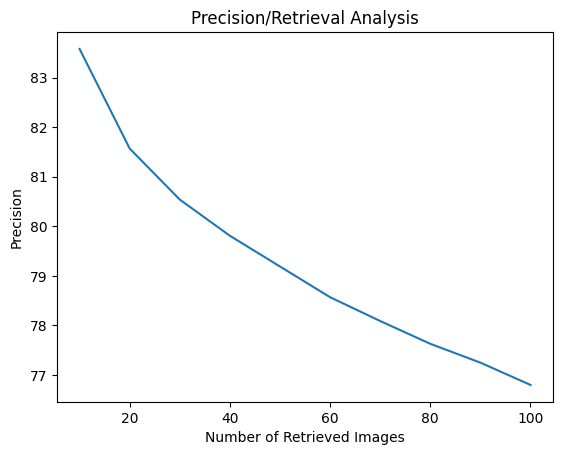

In [37]:
import matplotlib.pyplot as plt

# Sample data
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # X-axis values
y_values = [83.58,81.57,80.54,79.81,79.19,78.57,78.09,77.63,77.25,76.8]  # Y-axis values

# Plotting the line graph
plt.plot(x_values, y_values)

# Adding labels and title
plt.ylabel('Precision')
plt.xlabel('Number of Retrieved Images')
plt.title('Precision/Retrieval Analysis')

# Display the plot
plt.show()
